# Links:

- [Ridge Regression Scikit-learn](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)
- [Ridge Regression IBM](https://www.ibm.com/br-pt/think/topics/ridge-regression)

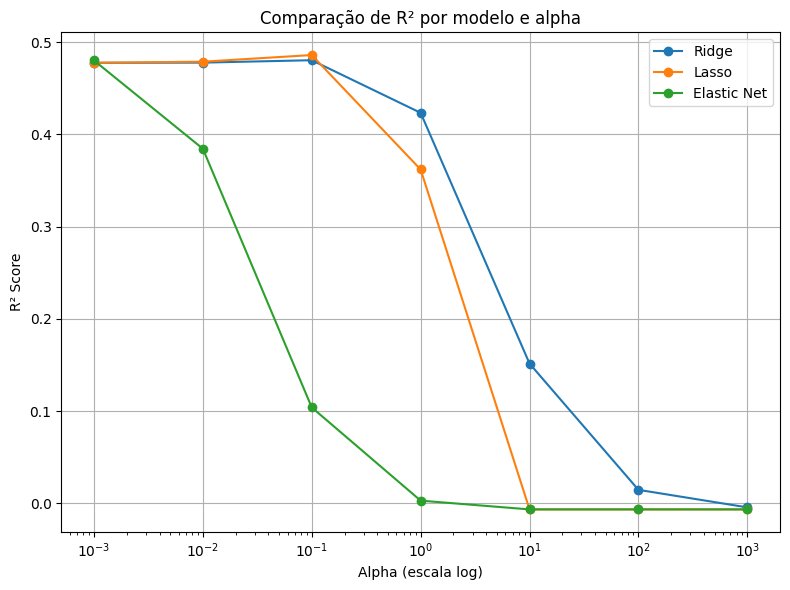

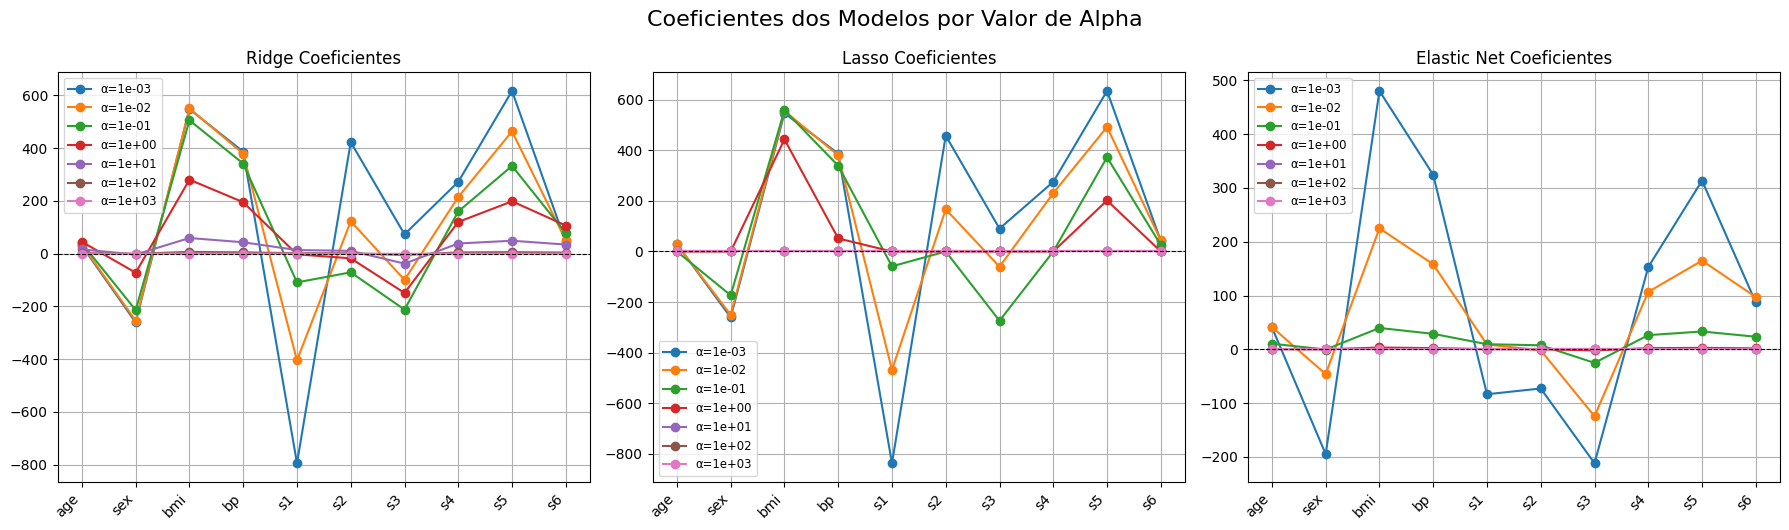

ValueError: x and y must have same first dimension, but have shapes (1,) and (10,)

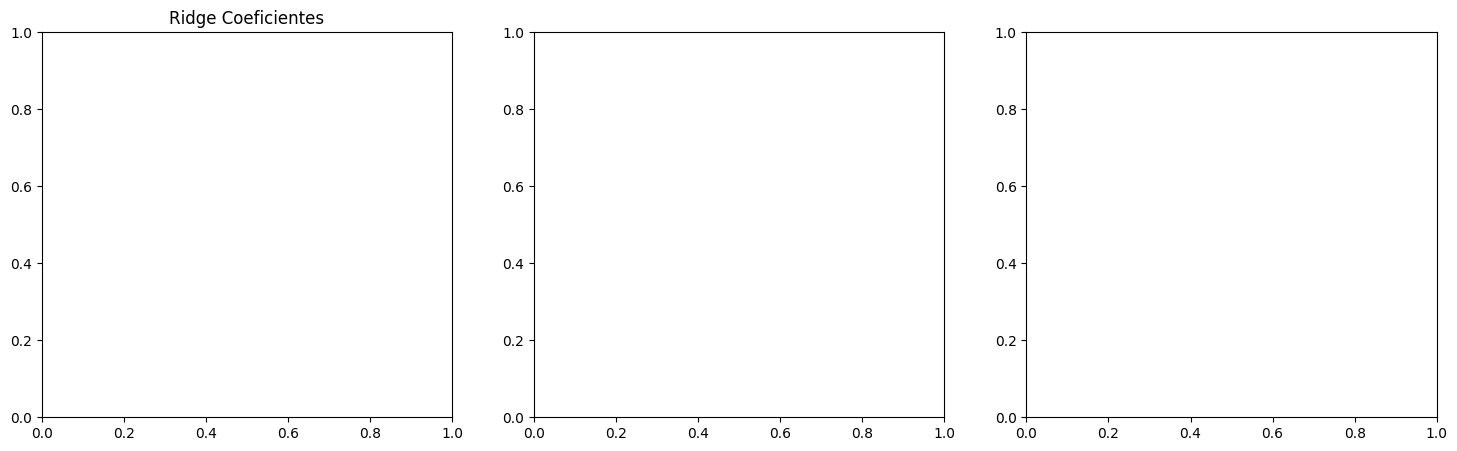

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from collections import defaultdict


models = {
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Elastic Net": ElasticNet()
}

dataset = load_diabetes()
X = dataset.data
y = dataset.target
feature_names = dataset.feature_names


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

alphas = np.logspace(-3, 3, 7)
results = []
coefs = defaultdict(list)

for model_name, model in models.items():
    for a in alphas:
        model.set_params(alpha=a)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        results.append({
            "Alpha": a,
            "Modelo": model_name,
            "R2 Score": round(r2, 4),
            "MSE": round(mse, 4)
        })
        
        coefs[model_name].append(model.coef_)


plt.figure(figsize=(8, 6))
for model_name in models:
    xs = [r["Alpha"] for r in results if r["Modelo"] == model_name]
    ys = [r["R2 Score"] for r in results if r["Modelo"] == model_name]
    plt.plot(xs, ys, marker='o', label=model_name)

plt.xscale("log")
plt.xlabel("Alpha (escala log)")
plt.ylabel("R² Score")
plt.title("Comparação de R² por modelo e alpha")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


n_features = X.shape[1]
fig, axs = plt.subplots(1, len(models), figsize=(18, 5))

for idx, (model_name, coef_list) in enumerate(coefs.items()):
    axs[idx].set_title(f"{model_name} Coeficientes")
    for i, alpha in enumerate(alphas):
        axs[idx].plot(range(n_features), coef_list[i], marker='o', label=f"α={alpha:.0e}")
    
    axs[idx].set_xticks(range(n_features))
    axs[idx].set_xticklabels(feature_names, rotation=45, ha='right')
    axs[idx].axhline(0, color='black', linestyle='--', linewidth=0.8)
    axs[idx].legend(fontsize='small')
    axs[idx].grid(True)

plt.tight_layout()
plt.suptitle("Coeficientes dos Modelos por Valor de Alpha", fontsize=16, y=1.05)
plt.show()


fig, axs = plt.subplots(1, len(models), figsize=(18, 5))

for idx, (model_name, coef_list) in enumerate(coefs.items()):
    axs[idx].set_title(f"{model_name} - Coeficiente x Alpha")
    
    coef_array = np.array(coef_list)  # shape: (len(alphas), n_features)
    
    for feature_idx in range(n_features):
        axs[idx].plot(alphas, coef_array[:, feature_idx], label=feature_names[feature_idx])
    
    axs[idx].set_xscale("log")
    axs[idx].set_xlabel("Alpha (log)")
    axs[idx].set_ylabel("Coeficiente")
    axs[idx].axhline(0, color='black', linestyle='--', linewidth=0.8)
    axs[idx].legend(fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')
    axs[idx].grid(True)

plt.tight_layout()
plt.suptitle("Evolução dos Coeficientes por Alpha (Regularização)", fontsize=16, y=1.05)
plt.show()

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df["target"] = dataset.target

display(df)

df_results = pd.DataFrame(results)
display(df_results)